In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('.//dataset-regression//house_price.csv')
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
if "date" in dataset.columns:
    dataset.drop("date",inplace=True,axis=1)
    print("date Deleted")
if "Date" in dataset.columns:
    dataset.drop("Date",inplace=True,axis=1)
    print("Date Deleted")

date Deleted


In [8]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

In [13]:
datatypes = dataset.dtypes
datatypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [20]:
cat_cols = []
num_cols = []
id1 = "id"

columns = dataset.columns
if id1 in dataset.columns:
    dataset.drop(id1,inplace=True,axis=1)

target_column = 'price'
for i in range(len(datatypes)):
    if datatypes.index[i] != target_column:
        if datatypes[i]=='object':
            unqval = dataset[datatypes.index[i]].nunique()
            if (unqval < 30):
                cat_cols.append(datatypes.index[i])
            else:
                del dataset[datatypes.index[i]]
                print('Deleted: ',datatypes.index[i])
        else:
            num_cols.append(datatypes.index[i])
num_cols

['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [21]:
cat_cols

['model', 'transmission', 'fuelType']

In [22]:
cat_data = []
num_data = []
if(len(cat_cols)>0):
    cat_data = dataset[cat_cols]
if(len(num_cols)>0):
    num_data = dataset[num_cols]
y_data = dataset[target_column]

In [23]:
num_data,cat_data

(       year  mileage  tax   mpg  engineSize
 0      2017    15735  150  55.4         1.4
 1      2016    36203   20  64.2         2.0
 2      2016    29946   30  55.4         1.4
 3      2017    25952  145  67.3         2.0
 4      2019     1998  145  49.6         1.0
 ...     ...      ...  ...   ...         ...
 10663  2020     4018  145  49.6         1.0
 10664  2020     1978  150  49.6         1.0
 10665  2020      609  150  49.6         1.0
 10666  2017     8646  150  47.9         1.4
 10667  2016    11855  150  47.9         1.4
 
 [10668 rows x 5 columns],
       model transmission fuelType
 0        A1       Manual   Petrol
 1        A6    Automatic   Diesel
 2        A1       Manual   Petrol
 3        A4    Automatic   Diesel
 4        A3       Manual   Petrol
 ...     ...          ...      ...
 10663    A3       Manual   Petrol
 10664    A3       Manual   Petrol
 10665    A3       Manual   Petrol
 10666    Q3    Automatic   Petrol
 10667    Q3       Manual   Petrol
 
 [10668 r

In [24]:
if len(num_data):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
    imputer.fit(num_data.iloc[:,:].values)
    num_data = pd.DataFrame(imputer.transform(num_data.iloc[:,:].values))
    num_data.columns = num_cols
num_data

,year,mileage,tax,mpg,engineSize
0,2017.0,15735.0,150.0,55.4,1.4
1,2016.0,36203.0,20.0,64.2,2.0
2,2016.0,29946.0,30.0,55.4,1.4
3,2017.0,25952.0,145.0,67.3,2.0
4,2019.0,1998.0,145.0,49.6,1.0
...,...,...,...,...,...
10663,2020.0,4018.0,145.0,49.6,1.0
10664,2020.0,1978.0,150.0,49.6,1.0
10665,2020.0,609.0,150.0,49.6,1.0
10666,2017.0,8646.0,150.0,47.9,1.4


In [25]:
if(len(cat_data)>0 and len(num_data)>0):
    print("1")
    df = pd.concat([num_data,cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
    df.isnull().sum()
elif(len(num_data) > 0):
    print("2")
    df = pd.concat([num_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
else:
    print("3")
    df = pd.concat([cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
(df)

1


,year,mileage,tax,mpg,engineSize,model,transmission,fuelType,price
0,2017.0,15735.0,150.0,55.4,1.4,A1,Manual,Petrol,12500
1,2016.0,36203.0,20.0,64.2,2.0,A6,Automatic,Diesel,16500
2,2016.0,29946.0,30.0,55.4,1.4,A1,Manual,Petrol,11000
3,2017.0,25952.0,145.0,67.3,2.0,A4,Automatic,Diesel,16800
4,2019.0,1998.0,145.0,49.6,1.0,A3,Manual,Petrol,17300
...,...,...,...,...,...,...,...,...,...
10663,2020.0,4018.0,145.0,49.6,1.0,A3,Manual,Petrol,16999
10664,2020.0,1978.0,150.0,49.6,1.0,A3,Manual,Petrol,16999
10665,2020.0,609.0,150.0,49.6,1.0,A3,Manual,Petrol,17199
10666,2017.0,8646.0,150.0,47.9,1.4,Q3,Automatic,Petrol,19499


In [26]:
cat_data = df[cat_cols]
num_data = df[num_cols]
y_data = df[target_column]
df.drop(target_column,inplace=True,axis=1)
len(y_data)

10668

In [27]:
#if len(cat_cols):
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(df[cat_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [28]:
OH_X

,year,mileage,tax,mpg,engineSize,0,1,2,3,4,...,22,23,24,25,26,27,28,29,30,31
0,2017.0,15735.0,150.0,55.4,1.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2016.0,36203.0,20.0,64.2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2016.0,29946.0,30.0,55.4,1.4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2017.0,25952.0,145.0,67.3,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2019.0,1998.0,145.0,49.6,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020.0,4018.0,145.0,49.6,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10664,2020.0,1978.0,150.0,49.6,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10665,2020.0,609.0,150.0,49.6,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10666,2017.0,8646.0,150.0,47.9,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc_x = StandardScaler()

In [31]:
OH_X = sc_x.fit_transform(OH_X)

In [32]:
OH_X

array([[-0.04644979, -0.3868356 ,  0.35714729, ..., -1.04664348,
        -0.05129892,  1.05216498],
       [-0.50783377,  0.48398914, -1.57832278, ...,  0.95543518,
        -0.05129892, -0.95042129],
       [-0.50783377,  0.21778089, -1.42944047, ..., -1.04664348,
        -0.05129892,  1.05216498],
       ...,
       [ 1.33770214, -1.03038137,  0.35714729, ..., -1.04664348,
        -0.05129892,  1.05216498],
       [-0.04644979, -0.68844184,  0.35714729, ..., -1.04664348,
        -0.05129892,  1.05216498],
       [-0.50783377, -0.55191279,  0.35714729, ..., -1.04664348,
        -0.05129892,  1.05216498]])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(OH_X,y_data,test_size=0.2,random_state=0)

7002729.920591464
6195151.311157926
6163586.990406985
6064208.650245407
6123606.621968812
6046178.290093752
6115813.577938425


<AxesSubplot:>

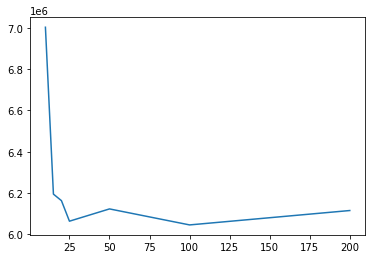

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
nodes = [10,15,20,25,50,100,200]
accuracy =[]
for node in nodes:    
    model = RandomForestRegressor(random_state=0, n_estimators=node)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    accs =mean_squared_error(y_test,preds)
    print(accs)
    accuracy.append(accs)
#     print(confusion_matrix(y_test,preds),'No of Estimators: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)

In [39]:
accs

6115813.577938425

In [34]:
from xgboost import XGBClassifier   #XGBoostClassifier
classifier = XGBClassifier(max_depth=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[14:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[33  4]
 [ 7 16]]


C:\Anaconda3\envs\tensorflow_en\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8166666666666667

In [35]:
rfc=RandomForestClassifier(random_state=42)

In [36]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [37]:
# from sklearn.model_selection import GridSearchCV
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)
# CV_rfc.best_params_

KeyboardInterrupt: 

In [ ]:
# rfc=RandomForestClassifier(random_state=42,criterion= 'gini',max_depth=4,max_features= 'auto',n_estimators= 200)

In [ ]:
# rfc.fit(X_train, y_train)
# preds = rfc.predict(X_test)
# accs = accuracy_score(y_test,preds)
# accuracy.append(accs)
# print(confusion_matrix(y_test,preds),'Accuracy: ',accs)